In [1]:
import pandas as pd

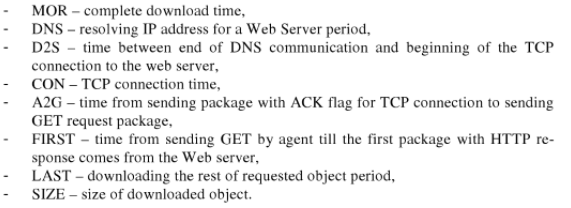

In [2]:
df = pd.read_csv('vegascsv.csv')
df

,agentId,slotId,mStart,sStart,mId,MOR,DNS,D2S,CON,A2G,FIRST,LAST,SIZE,URL
0,4,24,2008.10.28 23:59:40,2008.10.28 23:50:00,3,2346303,2231621,140,15692,94,15793,82963,137837,www.freesoft.org/CIE/RFC/Orig/rfc1945.txt
1,4,25,2008.10.29 00:00:04,2008.10.28 23:50:00,4,14495327,12366020,148,173258,102,902300,1053499,137943,ietfreport.isoc.org/rfc/rfc1945.txt
2,4,26,2008.10.29 00:00:21,2008.10.28 23:50:00,5,6655832,2490118,2250170,238809,96,242812,1433827,137905,paginas.fe.up.pt/~jvv/net/rfc1945.txt
3,4,27,2008.10.29 00:00:36,2008.10.28 23:50:00,6,5242728,750238,237478,249648,94,251032,3754238,137931,dbweb.csie.ncu.edu.tw/~sch/doc/rfc/rfc1945.txt
4,4,28,2008.10.29 00:00:50,2008.10.28 23:50:00,7,4555095,906484,2213287,204484,101,208894,1021845,137947,www-uxsup.csx.cam.ac.uk/pub/doc/rfc/rfc1945.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467385,4,53,2009.07.06 08:11:25,2009.07.06 08:00:00,642812,1244769,266973,241,111017,30,112965,753543,138025,www.w3.org/Protocols/rfc1945/rfc1945
467386,4,54,2009.07.06 08:11:36,2009.07.06 08:00:00,642813,220809,509,676,30637,156,32809,156022,137906,www.rfc-editor.org/rfc/rfc1945.txt
467387,4,55,2009.07.06 08:11:48,2009.07.06 08:00:00,642814,1286026,620,912,144929,103,264457,875005,137828,ftp.ring.gr.jp/pub/doc/RFC/rfc1945.txt
467388,4,56,2009.07.06 08:12:00,2009.07.06 08:00:00,642815,1754180,626,807,218816,99,218934,1314898,137943,www.nordu.net/rfc/rfc1945.txt


In [3]:
df['DATE'] = df['mStart'].str.split(' ').str[0]
df['TIME'] = df['mStart'].str.split(' ').str[1]
df['YEAR'] = df['DATE'].str.split('.', 1).str[0]
df['MONTH.DAY'] = df['DATE'].str.split('.', 1).str[1]
df['DAY'] = df['MONTH.DAY'].str.split('.', 1).str[1]
df['MONTH'] = df['MONTH.DAY'].str.split('.', 1).str[0]
df['HOUR'] = df['TIME'].str.split(':').str[0]
df['MIN'] = df['TIME'].str.split(':').str[1]

In [4]:
df[['YEAR', 'MONTH', 'DAY', 'TIME', 'MOR']]

,YEAR,MONTH,DAY,TIME,MOR
0,2008,10,28,23:59:40,2346303
1,2008,10,29,00:00:04,14495327
2,2008,10,29,00:00:21,6655832
3,2008,10,29,00:00:36,5242728
4,2008,10,29,00:00:50,4555095
...,...,...,...,...,...
467385,2009,07,06,08:11:25,1244769
467386,2009,07,06,08:11:36,220809
467387,2009,07,06,08:11:48,1286026
467388,2009,07,06,08:12:00,1754180


In [5]:
df[['HOUR', 'MIN', 'DAY', 'MONTH','YEAR', 'MOR', 'LAST']]

,HOUR,MIN,DAY,MONTH,YEAR,MOR,LAST
0,23,59,28,10,2008,2346303,82963
1,00,00,29,10,2008,14495327,1053499
2,00,00,29,10,2008,6655832,1433827
3,00,00,29,10,2008,5242728,3754238
4,00,00,29,10,2008,4555095,1021845
...,...,...,...,...,...,...,...
467385,08,11,06,07,2009,1244769,753543
467386,08,11,06,07,2009,220809,156022
467387,08,11,06,07,2009,1286026,875005
467388,08,12,06,07,2009,1754180,1314898


In [6]:
df2 = df.groupby('MONTH')['MOR'].mean()
df3 = df.groupby('MONTH')['MOR'].median()
df4 = df.groupby('MONTH')['MOR'].std()

df2.columns = ['MEAN']
df3.columns = ['MEDIAN']
df4.columns = ['STD']

pd.concat(dict(MEAN = df2, MEDIAN = df3, STD = df4),axis=1)
#pd.concat(dict(MEAN = df2, MEDIAN = df3, STD = df4),axis=1)#.to_csv('vegas_month.csv')

,MEAN,MEDIAN,STD
MONTH,,,
01,2.479925e+06,1541576.0,3.139673e+06
02,2.702215e+06,1600528.0,3.359995e+06
03,2.572713e+06,1537562.0,3.286023e+06
04,2.462994e+06,1544014.0,3.163651e+06
05,2.546134e+06,1577337.0,3.322728e+06
06,2.513353e+06,1534909.0,3.322143e+06
07,1.775673e+06,1468104.5,1.770831e+06
10,2.109728e+06,1495750.0,2.472575e+06
11,2.328669e+06,1515922.0,2.803171e+06


Text(0, 0.5, 'MOR')

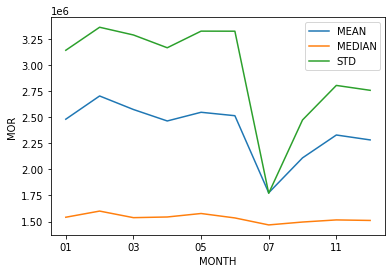

In [7]:
df_month = pd.concat(dict(MEAN = df2, MEDIAN = df3, STD = df4),axis=1)
a = df_month.plot()
a.set_ylabel('MOR')

In [8]:
df12 = df.groupby('DAY')['MOR'].mean()
df13 = df.groupby('DAY')['MOR'].median()
df14 = df.groupby('DAY')['MOR'].std()


df12.columns = ['MEAN']
df13.columns = ['MEDIAN']
df14.columns = ['STD']

pd.concat(dict(MEAN = df12, MEDIAN = df13, STD = df14),axis=1)
pd.concat(dict(MEAN = df12, MEDIAN = df13, STD = df14),axis=1)#.to_csv('vegas_day.csv')

,MEAN,MEDIAN,STD
DAY,,,
01,2.389351e+06,1541010.5,2.857818e+06
02,2.349845e+06,1525613.0,2.844028e+06
03,2.364848e+06,1517204.0,2.948710e+06
04,2.360008e+06,1525168.0,2.915366e+06
05,2.405595e+06,1522593.5,3.071423e+06
06,2.517848e+06,1542804.0,3.226057e+06
07,2.411306e+06,1535630.0,3.038344e+06
08,2.498043e+06,1554455.0,3.202296e+06
09,2.482527e+06,1554436.0,3.138420e+06


Text(0, 0.5, 'MOR')

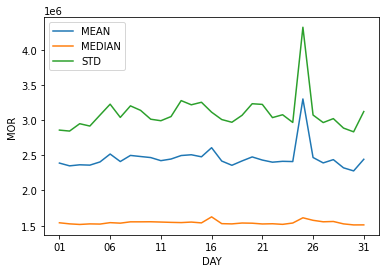

In [9]:
df_day = pd.concat(dict(MEAN = df12, MEDIAN = df13, STD = df14),axis=1)
b = df_day.plot()
b.set_ylabel('MOR')

In [10]:
df22 = df.groupby('YEAR')['MOR'].mean()
df23 = df.groupby('YEAR')['MOR'].median()
df24 = df.groupby('YEAR')['MOR'].std()


df22.columns = ['MEAN']
df23.columns = ['MEDIAN']
df24.columns = ['STD']

pd.concat(dict(MEAN = df22, MEDIAN = df23, STD = df24),axis=1)
#pd.concat(dict(MEAN = df22, MEDIAN = df23, STD = df24),axis=1).to_csv('vegas_year.csv')

,MEAN,MEDIAN,STD
YEAR,,,
2008,2.296704e+06,1511713.5,2.767043e+06
2009,2.523111e+06,1551939.5,3.238077e+06


Text(0, 0.5, 'MOR')

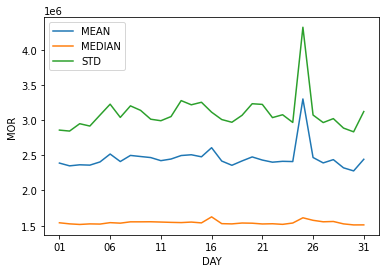

In [11]:
df_year = pd.concat(dict(MEAN = df12, MEDIAN = df13, STD = df14),axis=1)
c = df_year.plot()
c.set_ylabel('MOR')

In [12]:
df_day.to_csv('vegas_MOR_day.csv')
df_month.to_csv('vegas_MOR_month.csv')
df_year.to_csv('vegas_MOR_year.csv')